<a href="https://colab.research.google.com/github/ShoukkiyaAshraf/Machine-Learning/blob/master/forest_cover_type_nonlinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#dataset : from kaggle -> Forest Cover Type
# problem : classify the cover_type
# Algorithm Used : Support vector Machine using kernal

from sklearn import datasets
import numpy as np
import pandas as pd

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=1Jyi1mfRnh73qgpOYpiE1RwRDzDDZA_EU'

fluff, id = link.split('=')


print (id)

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('covtype.csv')  
data = pd.read_csv('covtype.csv')



1Jyi1mfRnh73qgpOYpiE1RwRDzDDZA_EU


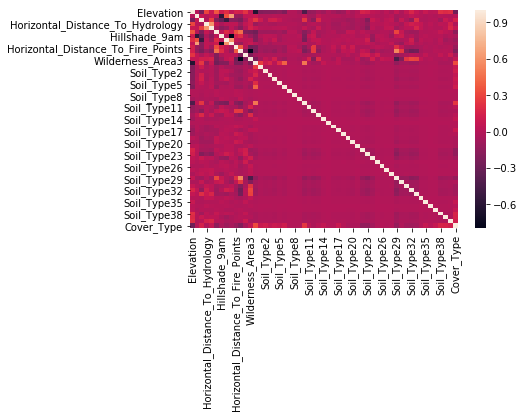

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)


corr = data.corr()
sns.heatmap(corr)

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
data=data.iloc[0:10000,:]

In [5]:
names=[]
length=len(data.columns)
print(length)
for col in range(length-1):
    names=np.append(names,data.columns[col])
x=pd.DataFrame(data,columns=names)
y=pd.DataFrame(data,columns=['Cover_Type'])

52


In [0]:
from sklearn.model_selection import train_test_split
#splitting train-test set
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=1,stratify=y)
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
norm.fit(x_train)
x_train_std = norm.transform(x_train)
#normalizing the values between -1  and 0
norm.fit(x_test)
x_test_std = norm.transform(x_test)

In [8]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state = 1,gamma=0.10 , C=10.0)
svm.fit(x_train_std,y_train)
from sklearn import metrics
prediction=svm.predict(x_test_std)
print(metrics.f1_score(y_test,prediction,average='micro'))

0.8085
